## Training area for agents that have been trained in running to Hunger Maze

In [1]:
# Imports
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt
import maze_generator.maze_dataset as md
import numpy as np
from DQN.training.basic import BaseTraining
from DQN.agents.runner_agent import MazeRunnerAgent
from DQN.agents.hungermaze import HungerGamesAgent
from DQN.agents.multihead_basic import MultiHeadAgent
from Maze_env.game_info.maze_runner_info import MazeRunner
from Maze_env.game_info.hunger_games_info import HungerGames

import DQN.models.base as base
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/TrainingGround


### Define the Mazes

In [2]:
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

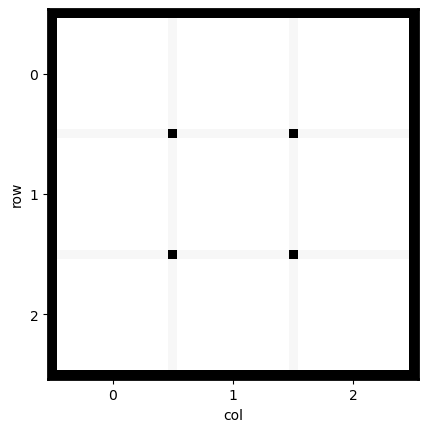

In [3]:
# example of the maze
dataset.show_maze(0)

In [4]:
# parameters for the agents
n_agents = 2
vision = 3

## First we will train an agent in Maze Runner with no collisions

In [5]:
%matplotlib notebook


# --- Agents for the Hunger Games --- #
maze_agent =MultiHeadAgent({'agents':base.MH_CNN},vision={'agents':vision},
                             action_type='cardinal',
                             dist_paradigm='path',
                             game_info=MazeRunner())

# --- trainer of the agent --- #
train = BaseTraining(name = 'GeneralRunner',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=30,
                              n_objects={'agents':n_agents},
                              start_epsilon=1.0,
                              final_epsilon = 0.05,
                              gamma = 0.99,
                              tau = 0.0001,
                               batch_size = 64,
                              lr = 0.0005,
                              lr_step_size=5000,
                              lr_gamma = 0.98,
                              l2_regular=0.01,
                              replay_buffer_size=200000,
                              replay_buffer_min_perc=0.1,
                              target_update=5000,
                              policy_update=1,
                              lambda_entropy=0.1,
                              beta = 0.4,
                              alpha = 0.6,
                              decay_total = 200000,
                              per = True,
                              frame_mult=1.5,
                              )
train.train(test_agent=True,peak=False)

{'agents': <Maze_env.reward_functions.maze_runner.MazeRunnerRewardsFun object at 0x7f98ad51baa0>}
Maze Runner
----------------------------------
Basic epsilon decay scheduler:
Start epsilon: 1.0
End epsilon: 0.05
Decay total: 200000
Decay rate: 0.0014903642610661133

------------------------------
Group 0: Learning rate = 0.0005
--------------------------------------
Basis learning rate scheduler:
Step size: 5000
Gamma: 0.98


/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'dict'>
  logger.warn(


KeyboardInterrupt: 

In [ ]:
train.save()
train.results()

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/training/basic.py:631: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = scores_df, x ='frame',y = 'score',ax = axe[1][1],palette='tab10')


<IPython.core.display.Javascript object>

In [ ]:
train.agents.test_agent(dataset,n_episodes=1000,len_game=15,num_objects={'agents':n_agents})

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'dict'>
  logger.warn(


{'agents': 0.1285000000000001}

In [8]:

train.agents.run_agent(dataset[0],num_objects={'agents':n_agents},n_episodes=20,len_game=15,epsilon=0,init_pos={})


cumulative reward: {'agents': [-212.5, -119.40185185185186]}
cumulative reward: {'agents': [-183.47592592592594, 75.78333333333335]}
cumulative reward: {'agents': [-119.40185185185186, -183.47592592592594]}
cumulative reward: {'agents': [-139.98333333333335, -209.2425925925926]}
cumulative reward: {'agents': [-312.5, -139.98333333333335]}
cumulative reward: {'agents': [-232.4574074074074, -162.5]}
cumulative reward: {'agents': [-259.7055555555555, 67.79444444444447]}
cumulative reward: {'agents': [-253.19814814814814, -212.5]}
cumulative reward: {'agents': [67.79444444444447, -262.5]}
cumulative reward: {'agents': [-209.2425925925926, -312.5]}
cumulative reward: {'agents': [-209.2425925925926, -212.5]}
cumulative reward: {'agents': [-139.98333333333335, -262.5]}
cumulative reward: {'agents': [-162.5, -183.47592592592594]}
cumulative reward: {'agents': [-212.5, 68.80555555555557]}
cumulative reward: {'agents': [-209.2425925925926, -188.50185185185185]}
cumulative reward: {'agents': [-21

## Now load in the agent we just trained and train it with Collision

In [9]:
hunger_agent = MultiHeadAgent.load('GeneralRunner',game_info=HungerGames())
hunger_agent.freeze_base(True)

# --- trainer of the agent --- #
train = BaseTraining(name = 'GeneralHunger',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=50,
                              n_objects={'agents':n_agents},
                              start_epsilon=1.0,
                              final_epsilon = 0.05,
                              gamma = 0.99,
                              tau = 0.0001,
                               batch_size = 64,
                              lr = 0.0005,
                              lr_step_size=5000,
                              lr_gamma = 0.98,
                              l2_regular=0.01,
                              replay_buffer_size=200000,
                              replay_buffer_min_perc=0.1,
                              target_update=5000,
                              policy_update=1,
                              lambda_entropy=0.1,
                              beta = 0.4,
                              alpha = 0.6,
                              decay_total = 200000,
                              per = True,
                              frame_mult=1.5,
                              )
train.train(test_agent=True,peak=False)

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/agents/basic.py:110: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  param_load[type_object] = torch.load(os.path.jo

TypeError: 'NoneType' object is not subscriptable

In [ ]:
train.save()
train.results()

In [ ]:
train.agents.test_agent(dataset,n_episodes=1000,len_game=15,num_objects={'agents':n_agents})

In [ ]:
train.agents.run_agent(dataset[0],num_objects={'agents':n_agents},n_episodes=20,len_game=15,epsilon=0,init_pos={})